In [ ]:
import pandas as pd

In [ ]:
amazon_df=pd.read_csv('./NLP/2/Reviews.csv',nrows=10)

In [ ]:
amazon_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
amazon_df=pd.read_csv('./NLP/2/Reviews.csv',usecols=['UserId','Score','Text'])

In [ ]:
amazon_df.shape

(568454, 3)

In [ ]:
amazon_df_negative=amazon_df[amazon_df['Score']<3]
amazon_df_positive=amazon_df[amazon_df['Score']>3]
del amazon_df
print(f'{amazon_df_negative.shape=},{amazon_df_positive.shape=}')

amazon_df_negative.shape = (82037, 3), amazon_df_positive.shape = (443777, 3)


In [ ]:
print('Duplicates in Negative DF : ',amazon_df_negative[amazon_df_negative.duplicated()].shape,'\nDuplicates in Positive DF : ',amazon_df_positive[amazon_df_positive.duplicated()].shape)

Duplicates in Negative DF :  (24948, 3) 
Duplicates in Positive DF :  (136946, 3)


In [ ]:
amazon_df_negative=amazon_df_negative.drop_duplicates()
amazon_df_positive=amazon_df_positive.drop_duplicates()
print('Duplicates in Negative DF : ',amazon_df_negative[amazon_df_negative.duplicated()].shape,'\nDuplicates in Positive DF : ',amazon_df_positive[amazon_df_positive.duplicated()].shape)
print(f'{amazon_df_negative.shape=},{amazon_df_positive.shape=}')

Duplicates in Negative DF :  (0, 3) 
Duplicates in Positive DF :  (0, 3)
amazon_df_negative.shape = (57089, 3), amazon_df_positive.shape = (306831, 3)


In [ ]:
print('Records Dropped in Positive Class : #',136946,' i.e ',int((136946/443777)*100),'% of total data',sep='')
print('Records Dropped in Negative Class : #',24948,' i.e ',int((24948/82037)*100),'% of total data',sep='')

Records Dropped in Positive Class : #136946 i.e 30% of total data
Records Dropped in Negative Class : #24948 i.e 30% of total data


In [ ]:
amazon_df_negative['UserId'].value_counts()

AKZKG2Z7CNV27     35
A2M9D9BDHONV3Y    30
A2MUGFV2TDQ47K    29
A2TN9C5E4A0I3F    26
A2XNJJ9TF70P4J    25
                  ..
A3FG03RM9AZNKP     1
A238V1MWVLQMSS     1
A2GXHMP9KHS3IX     1
ARK3R8WOCZMI2      1
A3I8AFVPEE8KI5     1
Name: UserId, Length: 48889, dtype: int64

In [ ]:
amazon_df_negative[amazon_df_negative['UserId']=='A2M9D9BDHONV3Y']['Score'].value_counts()

1    16
2    14
Name: Score, dtype: int64

In [ ]:
amazon_df_negative[amazon_df_negative['UserId']=='A2XNJJ9TF70P4J']['Score'].value_counts()

1    20
2     5
Name: Score, dtype: int64

In [ ]:
amazon_df_positive['UserId'].value_counts()

AY12DBB0U420B     305
A3OXHLG6DIBRW8    251
A281NPSIMI1C2R    224
A1YUL9PCJR3JTY    184
A1Z54EM24Y40LL    174
                 ... 
A21D27IDM2MDP3      1
AT8D1BM87NCRV       1
A12EXIL2QAU5KV      1
A25NBFSLONC04K      1
A3LGQPJCZVL9UC      1
Name: UserId, Length: 207065, dtype: int64

In [ ]:
amazon_df_positive[amazon_df_positive['UserId']=='AY12DBB0U420B'].head()

,UserId,Score,Text
109,AY12DBB0U420B,5,I'm presently on a diet and I was at my Fresh ...
2196,AY12DBB0U420B,4,A nearby Fresh and Easy Neighborhood Market st...
3016,AY12DBB0U420B,4,"When I'm working, I always carry my own lunch...."
3528,AY12DBB0U420B,4,In my trip through the health area of my local...
3826,AY12DBB0U420B,5,I've always liked licorice candy and the best ...


In [ ]:
amazon_df_positive[amazon_df_positive['UserId']=='AY12DBB0U420B']['Score'].value_counts()

5    246
4     59
Name: Score, dtype: int64

In [ ]:
amazon_df_positive[amazon_df_positive['UserId']=='A1Z54EM24Y40LL']['Score'].value_counts()

5    135
4     39
Name: Score, dtype: int64

In [ ]:
# Since all the reviews are positive we will consider only 1 review for each UserId
amazon_df_positive=amazon_df_positive.groupby(by=['UserId']).head(1)

# Since all the reviews are negative we will consider only 1 review for each UserId
amazon_df_negative=amazon_df_negative.groupby(by=['UserId']).head(1)

print(f'{amazon_df_negative.shape=},{amazon_df_positive.shape=}')

amazon_df_negative.shape = (48889, 3), amazon_df_positive.shape = (207065, 3)


In [ ]:
print('Records Retained in Positive Class : #',207065,' i.e ',int((207065/443777)*100),'% of total data',sep='')
print('Records Retained in Negative Class : #',48889,' i.e ',int((48889/82037)*100),'% of total data',sep='')

Records Retained in Positive Class : #207065 i.e 46% of total data
Records Retained in Negative Class : #48889 i.e 59% of total data


In [ ]:
amazon_df_positive=amazon_df_positive[['Text','Score']]
amazon_df_negative=amazon_df_negative[['Text','Score']]

In [ ]:
amazon_df_positive['Score'].value_counts()

5    173629
4     33436
Name: Score, dtype: int64

In [ ]:
amazon_df_negative['Score'].value_counts()

1    31568
2    17321
Name: Score, dtype: int64

In [ ]:
print('We are allowed to work on 10-20% of whole data which means #',int((568454*0.15)),' can be the total records we can use to work on out of #568,454!',sep='')

We are allowed to work on 10-20% of whole data which means #85268 can be the total records we can use to work on out of #568,454!


In [ ]:
print('#Records from Negative Class (1=17321 & 2=17321) and #Records from Positive Negative Class (4=17321 & 5=17321) gives a total of #',(17321*4),'!',sep='')

#Records from Negative Class (1 = 17321 & 2 = 17321) and #Records from Positive Negative Class (4 = 17321 & 5 = 17321) gives a total of #69284!


In [ ]:
amazon_df_negative_1=amazon_df_negative[amazon_df_negative['Score']==1].sample(n=17321,random_state=123)
amazon_df_negative_2=amazon_df_negative[amazon_df_negative['Score']==2]

amazon_df_positive_4=amazon_df_positive[amazon_df_positive['Score']==4].sample(n=17321,random_state=123)
amazon_df_positive_5=amazon_df_positive[amazon_df_positive['Score']==5].sample(n=17321,random_state=123)

amazon_df_negative_1['Label']=-1
amazon_df_negative_2['Label']=-1
amazon_df_positive_4['Label']=1
amazon_df_positive_5['Label']=1

amazon_df_negative_1=amazon_df_negative_1[['Text','Label']]
amazon_df_negative_2=amazon_df_negative_2[['Text','Label']]
amazon_df_positive_4=amazon_df_positive_4[['Text','Label']]
amazon_df_positive_5=amazon_df_positive_5[['Text','Label']]

print(f'{amazon_df_negative_1.shape=},\n{amazon_df_negative_2.shape=},\n{amazon_df_positive_4.shape=},\n{amazon_df_positive_5.shape=}')

amazon_df_negative_1.shape = (17321, 2),
amazon_df_negative_2.shape = (17321, 2),
amazon_df_positive_4.shape = (17321, 2),
amazon_df_positive_5.shape = (17321, 2)


In [ ]:
amazon_df=pd.concat(objs=[amazon_df_negative_1,amazon_df_negative_2,amazon_df_positive_4,amazon_df_positive_5])
amazon_df=amazon_df.sample(frac=1,random_state=123)
print(f'{amazon_df.shape=}')

amazon_df.shape = (69284, 2)


In [ ]:
amazon_df.head(5).to_dict(orient='records')

[{'Text': 'This coffee is alright. The taste is rather sourish and a bit bitter. It just does not taste very good. Maybe its because I am used to Lavazza and Sturbucks beans, but thats how I feel about it. I tried making it in my drip coffee maker (I have a very good coffee maker that releases most flavor) and french press, still it tasted mediocre. I ended up giving this coffee away.',
  'Label': -1},
 {'Text': "These caramels are insanely delicious, and unlike any I've tried before. Seriously. They are rich, buttery, the slight crunch from the salt just knocks them out of the ballpark, flavor-wise. I bought 3 bags, kept one and gave away 2...now I wish I had kept them all! They are fabulous!!!!",
  'Label': 1},
 {'Text': 'Kalvert Rose Syrup exceeded my expectations for flavor and aroma.  I use it in ice cream and in to sweeten some teas.',
  'Label': 1},
 {'Text': 'The package says it is a resealable zipper, but it does not fit well. You have to put it in the proper storage area to k

In [ ]:
amazon_df.tail(5).to_dict(orient='records')

[{'Text': 'My 3.5 yr old daughter with Autism loves these! She is on a special gluten-free, casein-free and soy-free diet and these are a wonderful snack for her.',
  'Label': 1},
 {'Text': 'The Kelloggs Muselix are delicious and the delivery was quick.<a href="http://www.amazon.com/gp/product/B001E6KBSK">Kellogg\'s Crispy Blend Mueslix Raisins, Dates & Almonds, 15.3-Ounce Unit (Pack of 5)</a>',
  'Label': 1},
 {'Text': 'I decided to give these a try.  The lids are VERY difficult to put on and I often ended up bending the cup while trying to affix the lid.  They do not seal perfectly and I often found unexpected puddles, but they do the job.  Since I have a Keurig permanant filter I thought of just buying the paper filters to save on cleanup.  For almost $11 from this vendor, you can get 50 (fifty) paper filters.....I would just assume use paper towels.  That works out to be just under 25 cents for a small piece of paper....DisposaKups, please re-evaluate your pricing!',
  'Label': -1}

In [ ]:
amazon_df['Label'].value_counts()

-1    34642
 1    34642
Name: Label, dtype: int64

In [ ]:
del amazon_df_negative_1,amazon_df_negative_2,amazon_df_positive_4,amazon_df_positive_5,amazon_df_positive,amazon_df_negative

In [ ]:
amazon_df.to_csv('./NLP/2/Sample_Reviews.csv',index=False)

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
amazon_df=pd.read_csv('./NLP/2/Sample_Reviews.csv')

In [ ]:
amazon_df.isnull().sum()

Text     0
Label    0
dtype: int64

In [ ]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69284 entries, 0 to 69283
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    69284 non-null  object
 1   Label   69284 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [ ]:
from bs4 import BeautifulSoup

In [ ]:
t1='I like McDougall\'s soups and was taken by the concept that they<br />are virtually non fat and provide fiber etc I am most disappointed<br />to find the manufacturer attempts deception of the consumer by<br />listing the nutritional values for one serving,whereas,in fact,<br />the values are for half a package. McDougall has lost all credibility<br />for me and I will not be purchasing again. It is offensive to treat<br />consumers in this way.<a href="http://www.amazon.com/gp/product/B0017U08M2">Dr. McDougall\'s Right Foods Vegan Split Pea Soup,Lower Sodium,1.9-Ounce Cups (Pack of 6)</a>'

In [ ]:
t1

'I like McDougall\'s soups and was taken by the concept that they<br />are virtually non fat and provide fiber etc I am most disappointed<br />to find the manufacturer attempts deception of the consumer by<br />listing the nutritional values for one serving, whereas, in fact,<br />the values are for half a package. McDougall has lost all credibility<br />for me and I will not be purchasing again. It is offensive to treat<br />consumers in this way.<a href="http://www.amazon.com/gp/product/B0017U08M2">Dr. McDougall\'s Right Foods Vegan Split Pea Soup, Lower Sodium, 1.9-Ounce Cups (Pack of 6)</a>'

In [ ]:
BeautifulSoup(t1,"lxml").get_text()

"I like McDougall's soups and was taken by the concept that theyare virtually non fat and provide fiber etc I am most disappointedto find the manufacturer attempts deception of the consumer bylisting the nutritional values for one serving, whereas, in fact,the values are for half a package. McDougall has lost all credibilityfor me and I will not be purchasing again. It is offensive to treatconsumers in this way.Dr. McDougall's Right Foods Vegan Split Pea Soup, Lower Sodium, 1.9-Ounce Cups (Pack of 6)"

In [ ]:
import re

In [ ]:
t2=re.compile(pattern=r'([a-z]+)\.+').sub(repl=r'\1 . ',string=str(t1).lower()).strip()
t2=re.compile(pattern=r'\<.*?\>').sub(repl=r' ',string=str(t2).lower()).strip()

In [ ]:
t2

"i like mcdougall's soups and was taken by the concept that they are virtually non fat and provide fiber etc i am most disappointed to find the manufacturer attempts deception of the consumer by listing the nutritional values for one serving, whereas, in fact, the values are for half a package .  mcdougall has lost all credibility for me and i will not be purchasing again .  it is offensive to treat consumers in this way .  dr .  mcdougall's right foods vegan split pea soup, lower sodium, 1.9-ounce cups (pack of 6)"

In [ ]:
BeautifulSoup(t2,"lxml").get_text()

"i like mcdougall's soups and was taken by the concept that they are virtually non fat and provide fiber etc i am most disappointed to find the manufacturer attempts deception of the consumer by listing the nutritional values for one serving, whereas, in fact, the values are for half a package .  mcdougall has lost all credibility for me and i will not be purchasing again .  it is offensive to treat consumers in this way .  dr .  mcdougall's right foods vegan split pea soup, lower sodium, 1.9-ounce cups (pack of 6)"

In [ ]:
del t1,t2

In [ ]:
from collections import Counter

In [ ]:
def join_pre_process_text(text:list=[])->str:
  return ' '.join(text)

def pre_process_text(text:str='',remove_punct=False)->list:
  text=re.compile(pattern=r'([a-z]+)\.+').sub(repl=r'\1 . ',string=str(text).lower())
  text=re.compile(pattern=r'\<.*?\>').sub(repl=r' ',string=str(text))
  if remove_punct:
    text=re.compile(pattern=r'[^a-z\d]+').sub(repl=r' ',string=str(text))
  text=re.compile(pattern=r'\s+').sub(repl=r' ',string=str(text)).strip()
  return text.split(' ')

def get_word_freq(df)->dict:
  all_tokens=[pre_process_text(text=review_1,remove_punct=True) for review_1 in df]
  all_tokens_flat=[token for sublist in all_tokens for token in sublist]
  word_freq=Counter(all_tokens_flat)
  return word_freq

In [ ]:
# for collection
word_freq_collection=get_word_freq(df=amazon_df['Text'])

# for positive reviews
word_freq_positive=get_word_freq(df=amazon_df[amazon_df['Label']==1]['Text'])

# for positive reviews
word_freq_negative=get_word_freq(df=amazon_df[amazon_df['Label']==-1]['Text'])

# filter only top 100 most common words
top_100_collection=word_freq_collection.most_common(100)
top_100_positive=word_freq_positive.most_common(100)
top_100_negative=word_freq_negative.most_common(100)

In [ ]:
len(top_100_collection),len(top_100_positive),len(top_100_negative)

(100, 100, 100)

In [ ]:
!pip install -qq wordcloud

In [ ]:
from wordcloud import WordCloud

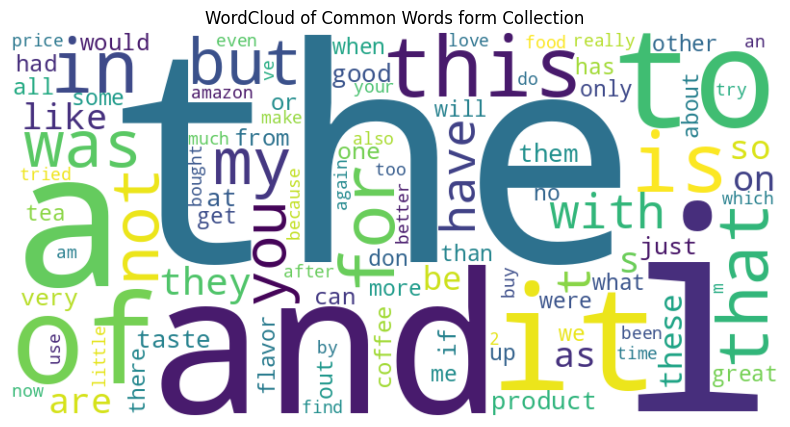

In [ ]:
# visualize common words using WordCloud for collection
wordcloud=WordCloud(width=800,height=400,background_color='white').generate_from_frequencies(dict(top_100_collection))

plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Common Words form Collection')
plt.show()

# wordcloud.to_file("top_100_collection.jpeg")

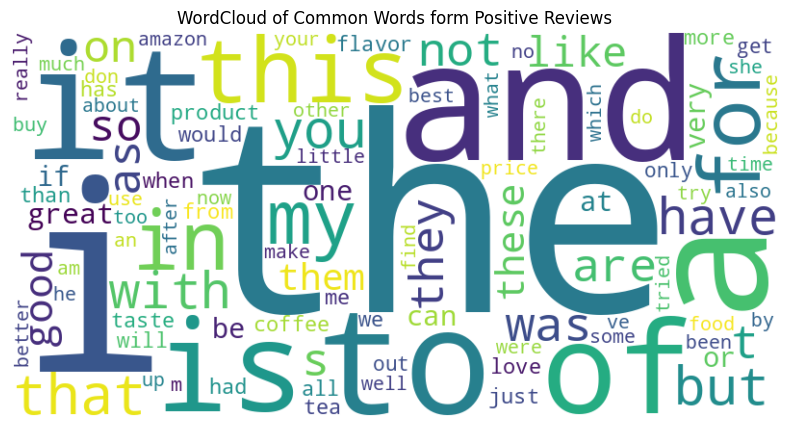

In [ ]:
# visualize common words using WordCloud for Positive Reviews
wordcloud=WordCloud(width=800,height=400,background_color='white').generate_from_frequencies(dict(top_100_positive))

plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Common Words form Positive Reviews')
plt.show()

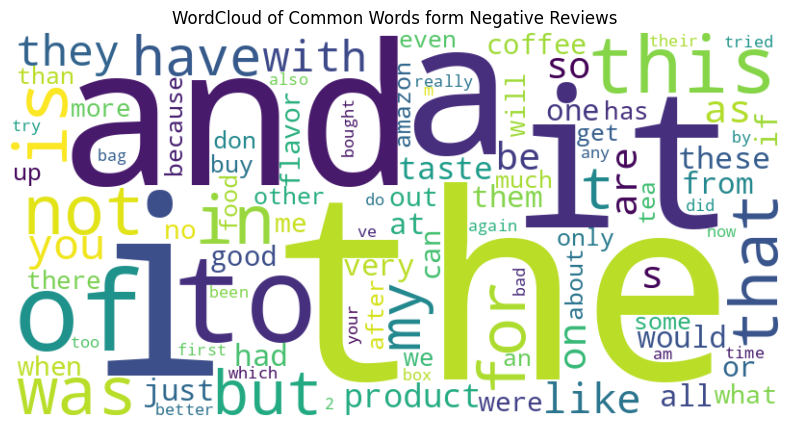

In [ ]:
# visualize common words using WordCloud for Negative Reviews
wordcloud=WordCloud(width=800,height=400,background_color='white').generate_from_frequencies(dict(top_100_negative))

plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Common Words form Negative Reviews')
plt.show()

In [ ]:
del top_100_collection,word_freq_collection,top_100_positive,word_freq_positive,top_100_negative,word_freq_negative,get_word_freq,wordcloud,BeautifulSoup,Counter,WordCloud

In [ ]:
amazon_df['Text'].iloc[0]

'This coffee is alright. The taste is rather sourish and a bit bitter. It just does not taste very good. Maybe its because I am used to Lavazza and Sturbucks beans, but thats how I feel about it. I tried making it in my drip coffee maker (I have a very good coffee maker that releases most flavor) and french press, still it tasted mediocre. I ended up giving this coffee away.'

In [ ]:
join_pre_process_text(text=pre_process_text(text=amazon_df['Text'].iloc[0],remove_punct=False))

'this coffee is alright . the taste is rather sourish and a bit bitter . it just does not taste very good . maybe its because i am used to lavazza and sturbucks beans, but thats how i feel about it . i tried making it in my drip coffee maker (i have a very good coffee maker that releases most flavor) and french press, still it tasted mediocre . i ended up giving this coffee away .'

In [ ]:
amazon_df['Text'].iloc[-2]

'I like McDougall\'s soups and was taken by the concept that they<br />are virtually non fat and provide fiber etc I am most disappointed<br />to find the manufacturer attempts deception of the consumer by<br />listing the nutritional values for one serving, whereas, in fact,<br />the values are for half a package. McDougall has lost all credibility<br />for me and I will not be purchasing again. It is offensive to treat<br />consumers in this way.<a href="http://www.amazon.com/gp/product/B0017U08M2">Dr. McDougall\'s Right Foods Vegan Split Pea Soup, Lower Sodium, 1.9-Ounce Cups (Pack of 6)</a>'

In [ ]:
join_pre_process_text(text=pre_process_text(text=amazon_df['Text'].iloc[-2],remove_punct=False))

"i like mcdougall's soups and was taken by the concept that they are virtually non fat and provide fiber etc i am most disappointed to find the manufacturer attempts deception of the consumer by listing the nutritional values for one serving, whereas, in fact, the values are for half a package . mcdougall has lost all credibility for me and i will not be purchasing again . it is offensive to treat consumers in this way . dr . mcdougall's right foods vegan split pea soup, lower sodium, 1.9-ounce cups (pack of 6)"

In [ ]:
amazon_df['Cleaned_Text']=amazon_df['Text'].apply(lambda x: join_pre_process_text(text=pre_process_text(text=x,remove_punct=True)))

In [ ]:
amazon_df.head(1).to_dict(orient='records')

[{'Text': 'This coffee is alright. The taste is rather sourish and a bit bitter. It just does not taste very good. Maybe its because I am used to Lavazza and Sturbucks beans, but thats how I feel about it. I tried making it in my drip coffee maker (I have a very good coffee maker that releases most flavor) and french press, still it tasted mediocre. I ended up giving this coffee away.',
  'Label': -1,
  'Cleaned_Text': 'this coffee is alright the taste is rather sourish and a bit bitter it just does not taste very good maybe its because i am used to lavazza and sturbucks beans but thats how i feel about it i tried making it in my drip coffee maker i have a very good coffee maker that releases most flavor and french press still it tasted mediocre i ended up giving this coffee away'}]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(amazon_df['Cleaned_Text'],amazon_df['Label'],test_size=0.2,random_state=1234)
del train_test_split

In [ ]:
print(f'{X_train.shape=},\n{X_test.shape=},\n{y_train.shape=},\n{y_test.shape=}')

X_train.shape = (55427,),
X_test.shape = (13857,),
y_train.shape = (55427,),
y_test.shape = (13857,)


In [ ]:
print(f'{type(X_train)=},\n{type(X_test)=},\n{type(y_train)=},\n{type(y_test)=}')

type(X_train) = <class 'pandas.core.series.Series'>,
type(X_test) = <class 'pandas.core.series.Series'>,
type(y_train) = <class 'pandas.core.series.Series'>,
type(y_test) = <class 'pandas.core.series.Series'>


In [ ]:
X_train.to_csv('./NLP/2/X_train.csv',index=False)
X_test.to_csv('./NLP/2/X_test.csv',index=False)
y_train.to_csv('./NLP/2/y_train.csv',index=False)
y_test.to_csv('./NLP/2/y_test.csv',index=False)

### Traditional TF-IDF Approach

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# 1. Extraction of features using TF-IDF (Term Frequency & Inverse Document Frequency)
tfidf_vectorizer=TfidfVectorizer(use_idf=True,max_features=2000)
X_train_tfidf=tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf=tfidf_vectorizer.transform(X_test)
del tfidf_vectorizer,TfidfVectorizer

In [ ]:
print(f'{X_train_tfidf.shape=},\n{X_test_tfidf.shape=},\n{type(X_train_tfidf)=},\n{type(X_test_tfidf)=}')

X_train_tfidf.shape = (55427, 2000),
X_test_tfidf.shape = (13857, 2000),
type(X_train_tfidf) = <class 'scipy.sparse._csr.csr_matrix'>,
type(X_test_tfidf) = <class 'scipy.sparse._csr.csr_matrix'>


In [ ]:
from sklearn.linear_model import LogisticRegression,SGDClassifier,RidgeClassifier,PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import time

In [ ]:
def get_evaluation_metrics(true_pred,test_pred):
  precision=precision_score(true_pred,test_pred)
  recall=recall_score(true_pred,test_pred)
  accuracy=accuracy_score(true_pred,test_pred)
  f1_scr=f1_score(true_pred,test_pred)
  return precision,recall,accuracy,f1_scr

def train_model(xtrain_records,ytrain_records,xtest_records,ytest_records)->list:
  # training different models

  nb_model=MultinomialNB()
  logistic_model=LogisticRegression()
  ridge_classifier_model=RidgeClassifier()
  passive_aggressive_model=PassiveAggressiveClassifier()
  nearest_centroid_model=NearestCentroid()
  sgd_model=SGDClassifier()
  rf_model=RandomForestClassifier()

  method_names=list()
  precs=list()
  recal=list()
  acc=list()
  f1s=list()

  print('Models Running : ',time.ctime())
  for model1,model_name in [
    (nb_model,"Naive Bayes"),
    (logistic_model,"Logistic Regression"),
    (ridge_classifier_model,"Ridge Classifier"),
    (passive_aggressive_model,"Passive Aggressive Classifier"),
    (nearest_centroid_model,"Nearest Centroid"),
    (sgd_model,"Stochastic Gradient Descent"),
    (rf_model,"Random Forest"),
    ]:
      try:
        model1.fit(xtrain_records,ytrain_records)
        p,r,a,f=get_evaluation_metrics(true_pred=ytest_records,test_pred=model1.predict(xtest_records))
        method_names.append(model_name)
        precs.append(p)
        recal.append(r)
        acc.append(a)
        f1s.append(f)
        print(model_name,time.ctime())
      except Exception as e:
        print('Error -> ',e,'===',model_name,time.ctime())
  return method_names,precs,recal,acc,f1s

In [ ]:
method_names_list,precision_list,recall_list,accuracy_list,f1_list=train_model(xtrain_records=X_train_tfidf,ytrain_records=y_train,xtest_records=X_test_tfidf,ytest_records=y_test)

Naive Bayes Sat Mar 16 20:57:04 2024
Logistic Regression Sat Mar 16 20:57:04 2024
Ridge Classifier Sat Mar 16 20:57:05 2024
Passive Aggressive Classifier Sat Mar 16 20:57:06 2024
Nearest Centroid Sat Mar 16 20:57:06 2024
Stochastic Gradient Descent Sat Mar 16 20:57:06 2024
Random Forest Sat Mar 16 20:57:07 2024


In [ ]:
!pip install -qq tabulate

In [ ]:
from tabulate import tabulate
# https://github.com/astanin/python-tabulate/blob/master/tabulate/__init__.py

In [ ]:
print(tabulate(tabular_data=pd.DataFrame(
    data={
          'Method':['TF-IDF -> '+x for x in method_names_list],
          'Precision':precision_list,
          'Recall':recall_list,
          'Accuracy':accuracy_list,
          'F1':f1_list,
          }
    ).sort_values(by=['F1','Precision','Recall','Accuracy'],ascending=[False,False,False,False]),headers='keys',tablefmt='rounded_grid'))

╭────┬─────────────────────────────────────────┬─────────────┬──────────┬────────────┬──────────╮
│    │ Method                                  │   Precision │   Recall │   Accuracy │       F1 │
├────┼─────────────────────────────────────────┼─────────────┼──────────┼────────────┼──────────┤
│  1 │ TF-IDF -> Logistic Regression           │    0.863543 │ 0.853266 │   0.859999 │ 0.858373 │
├────┼─────────────────────────────────────────┼─────────────┼──────────┼────────────┼──────────┤
│  2 │ TF-IDF -> Ridge Classifier              │    0.861168 │ 0.851669 │   0.857978 │ 0.856392 │
├────┼─────────────────────────────────────────┼─────────────┼──────────┼────────────┼──────────┤
│  5 │ TF-IDF -> Stochastic Gradient Descent   │    0.860223 │ 0.851234 │   0.857256 │ 0.855705 │
├────┼─────────────────────────────────────────┼─────────────┼──────────┼────────────┼──────────┤
│  0 │ TF-IDF -> Naive Bayes                   │    0.833406 │ 0.832075 │   0.833802 │ 0.83274  │
├────┼──────────────

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

In [ ]:
def custom_plot_confusion_matrix(model_to_fit,model_to_fit_name,xtrain_records,ytrain_records,xtest_records,ytest_records)->None:
  model_to_fit.fit(xtrain_records,ytrain_records)
  test_pred=model_to_fit.predict(xtest_records)
  plt.figure(figsize=(4,4))
  sns.heatmap(confusion_matrix(ytest_records,test_pred),annot=True,cmap='Blues',fmt='g',cbar=False,xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title(f'{model_to_fit_name} Confusion Matrix')
  plt.show()
  return None

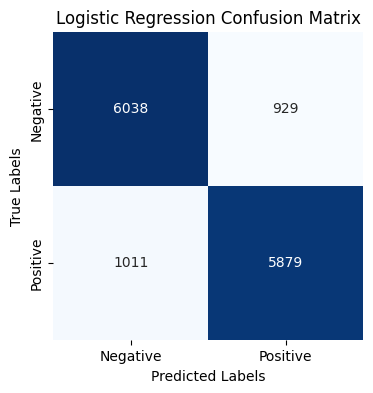

In [ ]:
custom_plot_confusion_matrix(
    model_to_fit=LogisticRegression(),
    model_to_fit_name='Logistic Regression',
    xtrain_records=X_train_tfidf,
    ytrain_records=y_train,
    xtest_records=X_test_tfidf,
    ytest_records=y_test,
    )

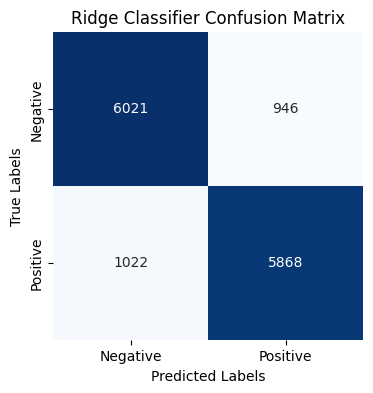

In [ ]:
custom_plot_confusion_matrix(
    model_to_fit=RidgeClassifier(),
    model_to_fit_name='Ridge Classifier',
    xtrain_records=X_train_tfidf,
    ytrain_records=y_train,
    xtest_records=X_test_tfidf,
    ytest_records=y_test,
    )

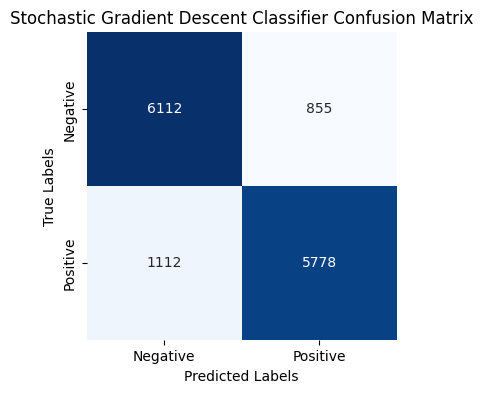

In [ ]:
custom_plot_confusion_matrix(
    model_to_fit=SGDClassifier(),
    model_to_fit_name='Stochastic Gradient Descent Classifier',
    xtrain_records=X_train_tfidf,
    ytrain_records=y_train,
    xtest_records=X_test_tfidf,
    ytest_records=y_test,
    )

In [ ]:
del X_train_tfidf,X_test_tfidf

### Word2Vec Approach

In [ ]:
!pip install -qq gensim

In [ ]:
import gensim

In [ ]:
# load Google's pre-trained Word2Vec model.
pre_w2v_model=gensim.models.KeyedVectors.load_word2vec_format('./snow_white_database/text_generation/GoogleNews-vectors-negative300.bin.gz',binary=True)

In [ ]:
print(type(pre_w2v_model))

<class 'gensim.models.keyedvectors.KeyedVectors'>


In [ ]:
amazon_df.head(1).to_dict(orient='records')

[{'Text': 'This coffee is alright. The taste is rather sourish and a bit bitter. It just does not taste very good. Maybe its because I am used to Lavazza and Sturbucks beans, but thats how I feel about it. I tried making it in my drip coffee maker (I have a very good coffee maker that releases most flavor) and french press, still it tasted mediocre. I ended up giving this coffee away.',
  'Label': -1,
  'Cleaned_Text': 'this coffee is alright the taste is rather sourish and a bit bitter it just does not taste very good maybe its because i am used to lavazza and sturbucks beans but thats how i feel about it i tried making it in my drip coffee maker i have a very good coffee maker that releases most flavor and french press still it tasted mediocre i ended up giving this coffee away'}]

In [ ]:
'customizeddsfsdfsd' in pre_w2v_model,'custom' in pre_w2v_model

(False, True)

In [ ]:
for i in range(97,123):
  l1=chr(i)
  print(l1,l1 in pre_w2v_model)

a False
b True
c True
d True
e True
f True
g True
h True
i True
j True
k True
l True
m True
n True
o True
p True
q True
r True
s True
t True
u True
v True
w True
x True
y True
z True


In [ ]:
'A' in pre_w2v_model,'a' in pre_w2v_model

(True, False)

In [ ]:
pre_w2v_model['coffee'].shape

(300,)

In [ ]:
import numpy as np

In [ ]:
def get_mean_embedding(array_for_mean:list)->np.array:
  return np.mean(array_for_mean,axis=0)

def get_w2v_embedding(model_name,text)->list:
  word_embedding=list()
  for word1 in text.split(' '):
    if word1 not in model_name:
      char_level_embed=list()
      for char1 in word1:
        if char1=='a':
          char1='A'
        char_level_embed.append(model_name[char1])
      word_embedding.append(get_mean_embedding(array_for_mean=char_level_embed))
    else:
      word_embedding.append(model_name[word1])
  return get_mean_embedding(array_for_mean=word_embedding)

In [ ]:
amazon_df.iloc[0]['Cleaned_Text']

'this coffee is alright the taste is rather sourish and a bit bitter it just does not taste very good maybe its because i am used to lavazza and sturbucks beans but thats how i feel about it i tried making it in my drip coffee maker i have a very good coffee maker that releases most flavor and french press still it tasted mediocre i ended up giving this coffee away'

In [ ]:
get_w2v_embedding(model_name=pre_w2v_model,text='this coffee is alright the taste').shape

(300,)

In [ ]:
get_w2v_embedding(model_name=pre_w2v_model,text=amazon_df.iloc[0]['Cleaned_Text']).shape

(300,)

In [ ]:
t1=np.zeros(shape=(4,300))
print(t1.shape)

for i,j in enumerate(amazon_df['Cleaned_Text'][:4]):
  t1[i]=get_w2v_embedding(model_name=pre_w2v_model,text=j)

print(t1.shape)
del t1,i,j

(4, 300)
(4, 300)


In [ ]:
def get_w2v_for_df(df,w2v_model)->np.array:
  temp_w2v=np.zeros(shape=(df.shape[0],300))
  for i,j in enumerate(df):
    temp_w2v[i]=get_w2v_embedding(model_name=w2v_model,text=j)
  return temp_w2v

In [ ]:
for x in X_test[0:2]:
  print(x)
del x

this is yummy easy and unusual it makes a quick delicous pie crisp or cobbler home made is better but a heck of a lot more work this is great to have on hand for last minute dessert needs where you really want to impress wih your creativity in cooking recommended
very chewy and not very tasty they actually almost made me throw up which i never feel like when eating octopus i m using into the fresh kind and never had it in a can before so my guess would be that it s not good in cans if it wasn t for the texture i may have been able to tolerate it and not give it to my cats


In [ ]:
X_train_w2v=get_w2v_for_df(df=X_train,w2v_model=pre_w2v_model)
X_test_w2v=get_w2v_for_df(df=X_test,w2v_model=pre_w2v_model)
print(f'{X_train_w2v.shape=},\n{X_test_w2v.shape=},\n{type(X_train_w2v)=},\n{type(X_test_w2v)=}')

X_train_w2v.shape = (55427, 300),
X_test_w2v.shape = (13857, 300),
type(X_train_w2v) = <class 'numpy.ndarray'>,
type(X_test_w2v) = <class 'numpy.ndarray'>


In [ ]:
method_names_list_w2v,precision_list_w2v,recall_list_w2v,accuracy_list_w2v,f1_list_w2v=train_model(xtrain_records=X_train_w2v,ytrain_records=y_train,xtest_records=X_test_w2v,ytest_records=y_test)

Models Running :  Sat Mar 16 21:46:11 2024
Error ->  Negative values in data passed to MultinomialNB (input X) === Naive Bayes Sat Mar 16 21:46:11 2024
Logistic Regression Sat Mar 16 21:46:17 2024
Ridge Classifier Sat Mar 16 21:46:19 2024
Passive Aggressive Classifier Sat Mar 16 21:46:20 2024
Nearest Centroid Sat Mar 16 21:46:20 2024
Stochastic Gradient Descent Sat Mar 16 21:46:21 2024
Random Forest Sat Mar 16 21:49:34 2024


In [ ]:
print(tabulate(tabular_data=pd.DataFrame(
    data={
          'Method':['Word2Vec -> '+x for x in method_names_list_w2v],
          'Precision':precision_list_w2v,
          'Recall':recall_list_w2v,
          'Accuracy':accuracy_list_w2v,
          'F1':f1_list_w2v,
          }
    ).sort_values(by=['F1','Precision','Recall','Accuracy'],ascending=[False,False,False,False]),headers='keys',tablefmt='rounded_grid'))

╭────┬───────────────────────────────────────────┬─────────────┬──────────┬────────────┬──────────╮
│    │ Method                                    │   Precision │   Recall │   Accuracy │       F1 │
├────┼───────────────────────────────────────────┼─────────────┼──────────┼────────────┼──────────┤
│  4 │ Word2Vec -> Stochastic Gradient Descent   │    0.786134 │ 0.834398 │   0.804792 │ 0.809547 │
├────┼───────────────────────────────────────────┼─────────────┼──────────┼────────────┼──────────┤
│  1 │ Word2Vec -> Ridge Classifier              │    0.824222 │ 0.792163 │   0.812658 │ 0.807874 │
├────┼───────────────────────────────────────────┼─────────────┼──────────┼────────────┼──────────┤
│  0 │ Word2Vec -> Logistic Regression           │    0.814349 │ 0.798984 │   0.809483 │ 0.806593 │
├────┼───────────────────────────────────────────┼─────────────┼──────────┼────────────┼──────────┤
│  2 │ Word2Vec -> Passive Aggressive Classifier │    0.819223 │ 0.78926  │   0.808617 │ 0.803962 │


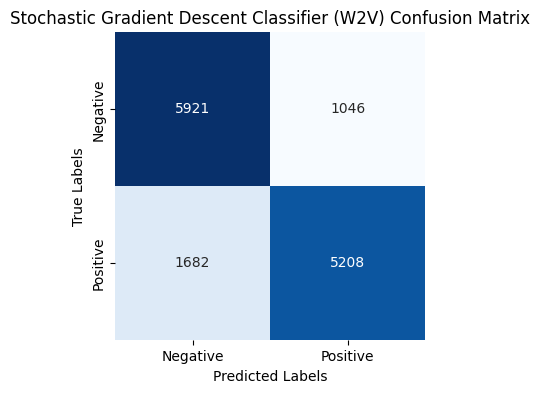

In [ ]:
custom_plot_confusion_matrix(
    model_to_fit=SGDClassifier(),
    model_to_fit_name='Stochastic Gradient Descent Classifier (W2V)',
    xtrain_records=X_train_w2v,
    ytrain_records=y_train,
    xtest_records=X_test_w2v,
    ytest_records=y_test,
    )

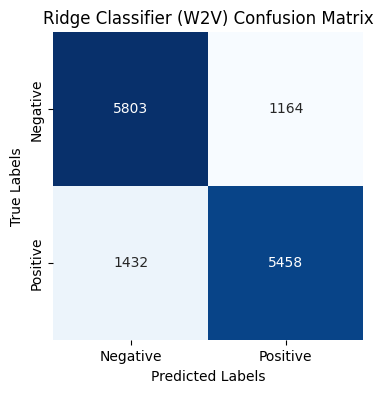

In [ ]:
custom_plot_confusion_matrix(
    model_to_fit=RidgeClassifier(),
    model_to_fit_name='Ridge Classifier (W2V)',
    xtrain_records=X_train_w2v,
    ytrain_records=y_train,
    xtest_records=X_test_w2v,
    ytest_records=y_test,
    )

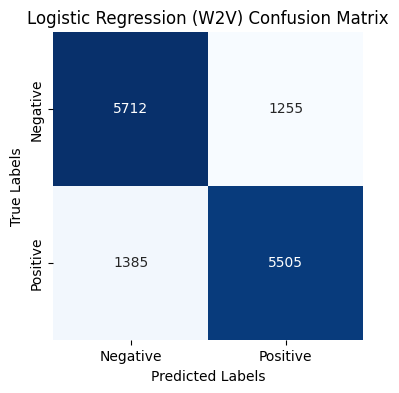

In [ ]:
custom_plot_confusion_matrix(
    model_to_fit=LogisticRegression(),
    model_to_fit_name='Logistic Regression (W2V)',
    xtrain_records=X_train_w2v,
    ytrain_records=y_train,
    xtest_records=X_test_w2v,
    ytest_records=y_test,
    )

In [ ]:
print(tabulate(tabular_data=pd.DataFrame(
    data={
          'Method':['TF-IDF -> '+x for x in method_names_list]+['Word2Vec -> '+x for x in method_names_list_w2v],
          'Precision':precision_list+precision_list_w2v,
          'Recall':recall_list+recall_list_w2v,
          'Accuracy':accuracy_list+accuracy_list_w2v,
          'F1':f1_list+f1_list_w2v,
          'Method Rank':[0]*len(f1_list)+[1]*len(f1_list_w2v),
          }
    ).sort_values(by=['Method Rank','F1','Precision','Recall','Accuracy'],ascending=[True,False,False,False,False]).reset_index(drop=True),headers='keys',tablefmt='rounded_grid'))

╭────┬───────────────────────────────────────────┬─────────────┬──────────┬────────────┬──────────┬───────────────╮
│    │ Method                                    │   Precision │   Recall │   Accuracy │       F1 │   Method Rank │
├────┼───────────────────────────────────────────┼─────────────┼──────────┼────────────┼──────────┼───────────────┤
│  0 │ TF-IDF -> Logistic Regression             │    0.863543 │ 0.853266 │   0.859999 │ 0.858373 │             0 │
├────┼───────────────────────────────────────────┼─────────────┼──────────┼────────────┼──────────┼───────────────┤
│  1 │ TF-IDF -> Ridge Classifier                │    0.861168 │ 0.851669 │   0.857978 │ 0.856392 │             0 │
├────┼───────────────────────────────────────────┼─────────────┼──────────┼────────────┼──────────┼───────────────┤
│  2 │ TF-IDF -> Stochastic Gradient Descent     │    0.860223 │ 0.851234 │   0.857256 │ 0.855705 │             0 │
├────┼───────────────────────────────────────────┼─────────────┼────────

In [ ]:
del X_train_w2v,X_test_w2v,pre_w2v_model,gensim,get_mean_embedding,get_w2v_embedding,get_w2v_for_df

### BERT Approach without fine tuning

In [ ]:
def check_max_length_of_review(df)->int:
  temp_df=df.copy().to_frame()
  temp_df['Len']=temp_df['Cleaned_Text'].str.len()
  return max(temp_df['Len'])

In [ ]:
print('Max Length of Review in Xtrain : ',check_max_length_of_review(df=X_train),' & Max Length of Review in X_test : ',check_max_length_of_review(df=X_test))

Max Length of Review in Xtrain :  9027  & Max Length of Review in X_test :  10874


In [ ]:
del check_max_length_of_review

In [ ]:
!pip install -qq transformers

In [ ]:
from transformers import pipeline

In [ ]:
bert_classifier=pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
bert_classifier("We are very happy to show you the 🤗 Transformers library.")

[{'label': 'POSITIVE', 'score': 0.9997795224189758}]

In [ ]:
amazon_df.head(3).to_dict(orient='records')

[{'Text': 'This coffee is alright. The taste is rather sourish and a bit bitter. It just does not taste very good. Maybe its because I am used to Lavazza and Sturbucks beans, but thats how I feel about it. I tried making it in my drip coffee maker (I have a very good coffee maker that releases most flavor) and french press, still it tasted mediocre. I ended up giving this coffee away.',
  'Label': -1,
  'Cleaned_Text': 'this coffee is alright the taste is rather sourish and a bit bitter it just does not taste very good maybe its because i am used to lavazza and sturbucks beans but thats how i feel about it i tried making it in my drip coffee maker i have a very good coffee maker that releases most flavor and french press still it tasted mediocre i ended up giving this coffee away'},
 {'Text': "These caramels are insanely delicious, and unlike any I've tried before. Seriously. They are rich, buttery, the slight crunch from the salt just knocks them out of the ballpark, flavor-wise. I bo

In [ ]:
bert_classifier(amazon_df.iloc[0]['Cleaned_Text'])

[{'label': 'NEGATIVE', 'score': 0.9956425428390503}]

In [ ]:
bert_classifier(amazon_df.iloc[1]['Cleaned_Text'])

[{'label': 'POSITIVE', 'score': 0.9991422891616821}]

In [ ]:
bert_classifier(amazon_df.iloc[1]['Cleaned_Text'])[0]['label']

'POSITIVE'

In [ ]:
def get_bert_classifier_predictions(model_name,txt)->int:
  if model_name(txt[0:512])[0]['label']=='POSITIVE':
    return 1
  else:
    return -1

In [ ]:
bert_classifier_pred_without_fine_tune=[get_bert_classifier_predictions(model_name=bert_classifier,txt=x) for x in X_test]

In [ ]:
def custom_plot_confusion_matrix_bert(ytest_records,test_pred)->None:
  plt.figure(figsize=(4,4))
  sns.heatmap(confusion_matrix(ytest_records,test_pred),annot=True,cmap='Blues',fmt='g',cbar=False,xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title(f'Bert w/o Fine Tune Confusion Matrix')
  plt.show()
  return None

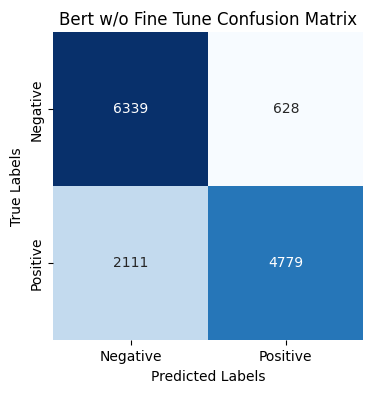

In [ ]:
custom_plot_confusion_matrix_bert(ytest_records=y_test,test_pred=bert_classifier_pred_without_fine_tune)

In [ ]:
precision_bert,recall_bert,accuracy_bert,f1_scr_bert=get_evaluation_metrics(true_pred=y_test,test_pred=bert_classifier_pred_without_fine_tune)

In [ ]:
print(tabulate(tabular_data=pd.DataFrame(
    data={
          'Method':['TF-IDF -> '+x for x in method_names_list]+['Word2Vec -> '+x for x in method_names_list_w2v]+['BERT w/o fine tune'],
          'Precision':precision_list+precision_list_w2v+[precision_bert],
          'Recall':recall_list+recall_list_w2v+[recall_bert],
          'Accuracy':accuracy_list+accuracy_list_w2v+[accuracy_bert],
          'F1':f1_list+f1_list_w2v+[f1_scr_bert],
          'Method Rank':[0]*len(f1_list)+[1]*len(f1_list_w2v)+[2],
          }
    ).sort_values(by=['Method Rank','F1','Precision','Recall','Accuracy'],ascending=[True,False,False,False,False]).reset_index(drop=True),headers='keys',tablefmt='rounded_grid'))

╭────┬───────────────────────────────────────────┬─────────────┬──────────┬────────────┬──────────┬───────────────╮
│    │ Method                                    │   Precision │   Recall │   Accuracy │       F1 │   Method Rank │
├────┼───────────────────────────────────────────┼─────────────┼──────────┼────────────┼──────────┼───────────────┤
│  0 │ TF-IDF -> Logistic Regression             │    0.863543 │ 0.853266 │   0.859999 │ 0.858373 │             0 │
├────┼───────────────────────────────────────────┼─────────────┼──────────┼────────────┼──────────┼───────────────┤
│  1 │ TF-IDF -> Ridge Classifier                │    0.861168 │ 0.851669 │   0.857978 │ 0.856392 │             0 │
├────┼───────────────────────────────────────────┼─────────────┼──────────┼────────────┼──────────┼───────────────┤
│  2 │ TF-IDF -> Stochastic Gradient Descent     │    0.860223 │ 0.851234 │   0.857256 │ 0.855705 │             0 │
├────┼───────────────────────────────────────────┼─────────────┼────────

In [ ]:
del custom_plot_confusion_matrix_bert,bert_classifier_pred_without_fine_tune,bert_classifier,pipeline

### BERT Approach with fine tuning

In [ ]:
!pip install -qq transformers tensorflow

In [ ]:
!pip install -qq tabulate
from tabulate import tabulate
# https://github.com/astanin/python-tabulate/blob/master/tabulate/__init__.py

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
X_train=pd.read_csv('./NLP/2/X_train.csv')
X_test=pd.read_csv('./NLP/2/X_test.csv')
y_train=pd.read_csv('./NLP/2/y_train.csv')
y_test=pd.read_csv('./NLP/2/y_test.csv')
y_train_bert_f_tune=np.where(y_train['Label']==-1,0,1)
y_test_bert_f_tune=np.where(y_test['Label']==-1,0,1)

In [ ]:
import tensorflow as tf
from transformers import TFDistilBertForSequenceClassification,DistilBertTokenizer

bert_model=TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
bert_tokenizer=DistilBertTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
# https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english
# max_seq_length
max_review_length=128
train_encodings=bert_tokenizer(list(X_train['Cleaned_Text'].values),truncation=True,padding=True,max_length=max_review_length)
test_encodings=bert_tokenizer(list(X_test['Cleaned_Text'].values),truncation=True,padding=True,max_length=max_review_length)

In [ ]:
train_dataset=tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train_bert_f_tune
))
test_dataset=tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test_bert_f_tune
))

In [ ]:
print(len(train_dataset),len(test_dataset))

55427 13857


In [ ]:
# 85% of the data for training
train_size=int(0.85 * len(train_dataset))
train_dataset_2=train_dataset.take(train_size)
val_dataset=train_dataset.skip(train_size)

In [ ]:
print(len(train_dataset),len(test_dataset),len(train_dataset_2),len(val_dataset))

55427 13857 47112 8315


In [ ]:
bert_batch_size=16
bert_epochs=4
bert_model.compile(optimizer='Adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=[tf.metrics.SparseCategoricalAccuracy('accuracy')])

In [ ]:
# Fine-tune the model
bert_history=bert_model.fit(train_dataset_2.shuffle(len(train_dataset_2)).batch(bert_batch_size),
          epochs=bert_epochs,
          batch_size=bert_batch_size,
          validation_data=val_dataset.shuffle(len(val_dataset)).batch(bert_batch_size),
                            )

Epoch 1/4


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
2945/2945 [==============================] - 779s 238ms/step - loss: 0.6960 - accuracy: 0.4940 - val_loss: 0.6947 - val_accuracy: 0.4987
Epoch 2/4
2945/2945 [==============================] - 679s 230ms/step - loss: 0.6939 - accuracy: 0.4991 - val_loss: 0.6940 - val_accuracy: 0.4988
Epoch 3/4
2945/2945 [==============================] - 671s 228ms/step - loss: 0.6934 - accuracy: 0.4987 - val_loss: 0.6933 - val_accuracy: 0.4992
Epoch 4/4
2945/2945 [==============================] - 672s 228ms/step - loss: 0.6970 - accuracy: 0.4992 - val_loss: 0.6931 - val_accuracy: 0.4996


In [ ]:
test_loss,test_accuracy=bert_model.evaluate(test_dataset.batch(bert_batch_size))
print(f"Test Loss: {test_loss},Test Accuracy: {test_accuracy}")

4/4 [==============================] - 22s 5s/step - loss: 0.6578 - accuracy: 0.5834
Test Loss: 0.6578419208526611, Test Accuracy: 0.5833970308303833


In [ ]:
pred_list=bert_model.predict(test_dataset.batch(bert_batch_size))

4/4 [==============================] - 14s 2s/step


In [ ]:
np.where(pred_list.logits[:,0] > 0,-1,1)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
y_test.to_numpy().reshape(-1)

array([ 1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
       -1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1,  1,
       -1,  1,  1,  1,  1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1,  1])

In [ ]:
y_test_bert_f_tune

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1])

In [ ]:
bert_classifier_pred_with_fine_tune=bert_model.predict(test_dataset.batch(bert_batch_size))
bert_classifier_pred_with_fine_tune=np.argmax(bert_classifier_pred_with_fine_tune.logits,axis=1)

867/867 [==============================] - 67s 74ms/step


In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

def get_evaluation_metrics(true_pred,test_pred):
  precision=precision_score(true_pred,test_pred,zero_division='warn')
  recall=recall_score(true_pred,test_pred)
  accuracy=accuracy_score(true_pred,test_pred)
  f1_scr=f1_score(true_pred,test_pred)
  return precision,recall,accuracy,f1_scr

def custom_plot_confusion_matrix_bert(ytest_records,test_pred)->None:
  plt.figure(figsize=(4,4))
  sns.heatmap(confusion_matrix(ytest_records,test_pred),annot=True,cmap='Blues',fmt='g',cbar=False,xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title(f'Bert with Fine Tune Confusion Matrix')
  plt.show()
  return None

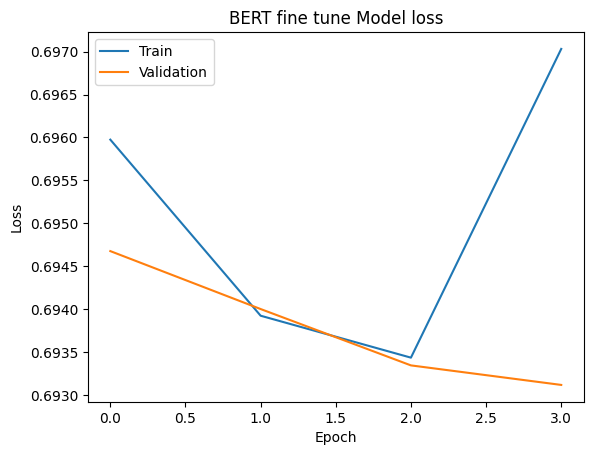

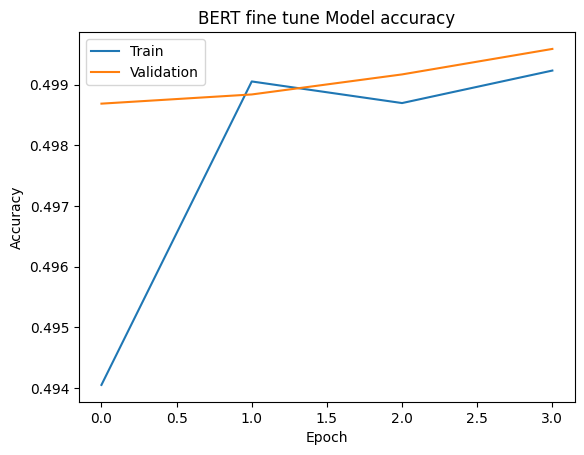

In [ ]:
plt.plot(bert_history.history['loss'])
plt.plot(bert_history.history['val_loss'])
plt.title('BERT fine tune Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()
plt.plot(bert_history.history['accuracy'])
plt.plot(bert_history.history['val_accuracy'])
plt.title('BERT fine tune Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

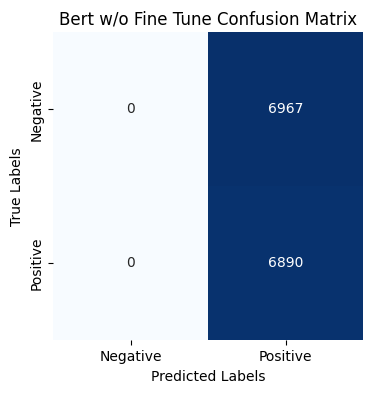

In [ ]:
custom_plot_confusion_matrix_bert(ytest_records=y_test_bert_f_tune,test_pred=bert_classifier_pred_with_fine_tune)

In [ ]:
precision_bert_w_f_t,recall_bert_w_f_t,accuracy_bert_w_f_t,f1_scr_bert_w_f_t=get_evaluation_metrics(true_pred=y_test_bert_f_tune,test_pred=bert_classifier_pred_with_fine_tune)

In [ ]:
precision_bert_w_f_t,recall_bert_w_f_t,accuracy_bert_w_f_t,f1_scr_bert_w_f_t

(0.497221620841452, 1.0, 0.497221620841452, 0.6641924133609679)

In [ ]:
import pandas as pd

In [ ]:
report_df=pd.read_csv('./NLP/2/Pred_Report.csv')

In [ ]:
report_df=report_df.append({'Method':'BERT witth fine tune','Precision':precision_bert_w_f_t,'Recall':recall_bert_w_f_t,'Accuracy':accuracy_bert_w_f_t,'F1':f1_scr_bert_w_f_t,'Method Rank':3,},ignore_index=True)

In [ ]:
report_df.to_csv('./NLP/2/Pred_Report_2.csv',index=False)

In [ ]:
del report_df

### BERT Approach with fine tuning using LoRA

In [ ]:
!pip install -qq transformers tensorflow peft

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [ ]:
!pip install -qq tabulate
from tabulate import tabulate
# https://github.com/astanin/python-tabulate/blob/master/tabulate/__init__.py

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from transformers import BertForSequenceClassification,AutoTokenizer,Trainer,TrainingArguments
import torch
from peft import LoraConfig,TaskType,get_peft_model

In [ ]:
bert_model=BertForSequenceClassification.from_pretrained("distilbert-base-uncased",num_labels=2)
bert_tokenizer=AutoTokenizer.from_pretrained("distilbert-base-uncased")
bert_model=get_peft_model(bert_model,LoraConfig(task_type=TaskType.SEQ_CLS,inference_mode=False,r=1,lora_alpha=1,lora_dropout=0.1,target_modules=["key","query","value"],))
print(bert_model.print_trainable_parameters())

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'embeddings.LayerNorm.bias', 'embeddings.LayerNorm.weight', 'embeddings.position_embeddings.weight', 'embeddings.token_type_embeddings.weight', 'embeddings.word_embeddings.weight', 'encoder.layer.0.attention.output.LayerNorm.bias', 'encoder.layer.0.attention.output.LayerNorm.weight', 'encoder.layer.0.attention.output.dense.bias', 'encoder.layer.0.attention.output.dense.weight', 'encoder.layer.0.attention.self.key.bias', 'encoder.layer.0.attention.self.key.weight', 'encoder.layer.0.attention.self.query.bias', 'encoder.layer.0.attention.self.query.weight', 'encoder.layer.0.attention.self.value.bias', 'encoder.layer.0.attention.self.value.weight', 'encoder.layer.0.intermediate.dense.bias', 'encoder.layer.0.intermediate.dense.weight', 'encoder.layer.0.output.LayerNorm.bias', 'encoder.layer.0.output.LayerN

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

trainable params: 56,834 || all params: 109,540,612 || trainable%: 0.05188395332317479
None


In [ ]:
X_train=pd.read_csv('./NLP/2/X_train.csv')
X_test=pd.read_csv('./NLP/2/X_test.csv')
y_train=pd.read_csv('./NLP/2/y_train.csv')
y_test=pd.read_csv('./NLP/2/y_test.csv')
y_train=np.where(y_train['Label']==-1,0,1)
y_test=np.where(y_test['Label']==-1,0,1)

# Split data into training and evaluation datasets
X_train,X_eval,y_train,y_eval=train_test_split(X_train,y_train,test_size=0.15,random_state=123)
print(f'{X_train.shape=},\n{y_train.shape=},\n{X_eval.shape=},\n{y_eval.shape=},\n{X_test.shape=},\n{y_test.shape=}')

# Tokenize input data
X_train=bert_tokenizer(list(X_train['Cleaned_Text'].values),padding=True,truncation=True,return_tensors="pt")
X_eval=bert_tokenizer(list(X_eval['Cleaned_Text'].values),padding=True,truncation=True,return_tensors="pt")
X_test=bert_tokenizer(list(X_test['Cleaned_Text'].values),padding=True,truncation=True,return_tensors="pt")

# Convert labels to PyTorch tensors
y_train=torch.tensor(y_train)
y_eval=torch.tensor(y_eval)
y_test=torch.tensor(y_test)

# Define training dataset
train_dataset=torch.utils.data.TensorDataset(X_train['input_ids'],X_train['attention_mask'],y_train)
eval_dataset=torch.utils.data.TensorDataset(X_eval['input_ids'],X_eval['attention_mask'],y_eval)
test_dataset=torch.utils.data.TensorDataset(X_test['input_ids'],X_test['attention_mask'],y_test)

# Define training arguments
training_args=TrainingArguments(
    output_dir='./NLP/2/',
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    logging_dir='/NLP/2/logs/',
)

# Define Trainer with custom data collator
class CustomDataCollator:
    def __call__(self,features):
        input_ids=torch.stack([f[0] for f in features])
        attention_mask=torch.stack([f[1] for f in features])
        labels=torch.tensor([f[2] for f in features])
        return {"input_ids": input_ids,"attention_mask": attention_mask,"labels": labels}

trainer=Trainer(
    model=bert_model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    data_collator=CustomDataCollator()
)

X_train.shape = (47112, 1),
y_train.shape = (47112,),
X_eval.shape = (8315, 1),
y_eval.shape = (8315,),
X_test.shape = (13857, 1),
y_test.shape = (13857,)


/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [ ]:
# Fine-tune the model
trainer.train()

Step,Training Loss
500,0.698500
1000,0.693500
1500,0.688000
2000,0.681100
2500,0.657100
3000,0.635400
3500,0.603400
4000,0.591500
4500,0.581000
5000,0.570900


You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
You are using a model of type distilbert to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.
You are using a model of type distilbert to instantiate a model of typ

TrainOutput(global_step=17667, training_loss=0.5654516519684807, metrics={'train_runtime': 9777.8057, 'train_samples_per_second': 14.455, 'train_steps_per_second': 1.807, 'total_flos': 3.721174054472909e+16, 'train_loss': 0.5654516519684807, 'epoch': 3.0})

In [ ]:
device=next(bert_model.parameters()).device

In [ ]:
# Get predictions
bert_classifier_pred_with_fine_tune_lora=[]

for inputs in test_dataset:
    input_ids,attention_mask,_=inputs
    input_ids=input_ids.unsqueeze(0)
    attention_mask=attention_mask.unsqueeze(0)
    input_ids=input_ids.to(device)
    attention_mask=attention_mask.to(device)
    with torch.no_grad():
        outputs=bert_model(input_ids=input_ids,attention_mask=attention_mask)
    predicted_labels=torch.argmax(outputs.logits,axis=1)
    bert_classifier_pred_with_fine_tune_lora.extend(predicted_labels.tolist())

In [ ]:
bert_classifier_pred_with_fine_tune_lora=torch.tensor(bert_classifier_pred_with_fine_tune_lora)

In [ ]:
bert_classifier_pred_with_fine_tune_lora

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

def get_evaluation_metrics(true_pred,test_pred):
  precision=precision_score(true_pred,test_pred,zero_division='warn')
  recall=recall_score(true_pred,test_pred)
  accuracy=accuracy_score(true_pred,test_pred)
  f1_scr=f1_score(true_pred,test_pred)
  return precision,recall,accuracy,f1_scr

def custom_plot_confusion_matrix_bert(ytest_records,test_pred)->None:
  plt.figure(figsize=(4,4))
  sns.heatmap(confusion_matrix(ytest_records,test_pred),annot=True,cmap='Blues',fmt='g',cbar=False,xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title(f'Bert with Fine Tune + LoRA Confusion Matrix')
  plt.show()
  return None

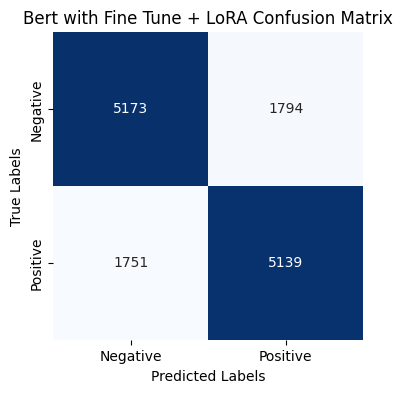

In [ ]:
custom_plot_confusion_matrix_bert(ytest_records=y_test,test_pred=bert_classifier_pred_with_fine_tune_lora)

In [ ]:
precision_bert_w_f_t_lora,recall_bert_w_f_t_lora,accuracy_bert_w_f_t_lora,f1_scr_bert_w_f_t_lora=get_evaluation_metrics(true_pred=y_test,test_pred=bert_classifier_pred_with_fine_tune_lora)

In [ ]:
precision_bert_w_f_t_lora,recall_bert_w_f_t_lora,accuracy_bert_w_f_t_lora,f1_scr_bert_w_f_t_lora

(0.7412375594980528,
 0.7458635703918722,
 0.7441726203362922,
 0.7435433697460753)

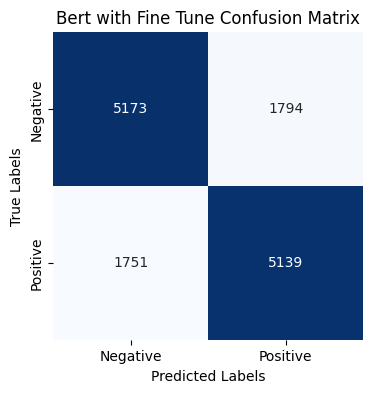

In [ ]:
def custom_plot_confusion_matrix_bert(ytest_records,test_pred)->None:
  plt.figure(figsize=(4,4))
  sns.heatmap(confusion_matrix(ytest_records,test_pred),annot=True,cmap='Blues',fmt='g',cbar=False,xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title(f'Bert with Fine Tune Confusion Matrix')
  plt.show()
  return None

custom_plot_confusion_matrix_bert(ytest_records=y_test,test_pred=bert_classifier_pred_with_fine_tune_lora)

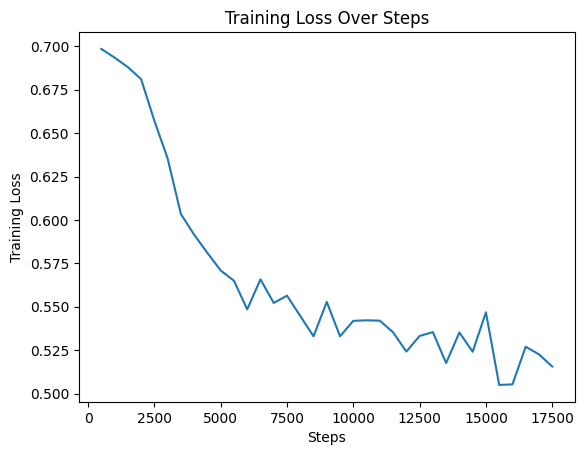

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Data
train_steps=[500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000,10500,11000,11500,12000,12500,13000,13500,14000,14500,15000,15500,16000,16500,17000,17500]
train_loss=[0.698500,0.693500,0.688000,0.681100,0.657100,0.635400,0.603400,0.591500,0.581000,0.570900,0.565000,0.548500,0.565800,0.552200,0.556400,0.544700,0.533000,0.552800,0.533000,0.541900,0.542200,0.542000,0.535300,0.524200,0.533200,0.535400,0.517600,0.535200,0.524100,0.546800,0.505000,0.505300,0.527000,0.522600,0.515600,]

plt.plot(train_steps,train_loss)
plt.title('Training Loss Over Steps')
plt.xlabel('Steps')
plt.ylabel('Training Loss')
plt.show()

In [ ]:
torch.save(bert_model.state_dict(),'./NLP/2/bert_model_lora.pth')

### Producing Final Report

In [ ]:
print(tabulate(tabular_data=report_df,headers='keys',tablefmt='rounded_grid'))

╭────┬───────────────────────────────────────────┬─────────────┬──────────┬────────────┬────────┬───────────────╮
│    │ Method                                    │   Precision │   Recall │   Accuracy │     F1 │   Method Rank │
├────┼───────────────────────────────────────────┼─────────────┼──────────┼────────────┼────────┼───────────────┤
│  0 │ TF-IDF -> Logistic Regression             │      0.8635 │   0.8533 │     0.86   │ 0.8584 │             0 │
├────┼───────────────────────────────────────────┼─────────────┼──────────┼────────────┼────────┼───────────────┤
│  1 │ TF-IDF -> Ridge Classifier                │      0.8612 │   0.8517 │     0.858  │ 0.8564 │             0 │
├────┼───────────────────────────────────────────┼─────────────┼──────────┼────────────┼────────┼───────────────┤
│  2 │ TF-IDF -> Stochastic Gradient Descent     │      0.8602 │   0.8512 │     0.8573 │ 0.8557 │             0 │
├────┼───────────────────────────────────────────┼─────────────┼──────────┼────────────┼

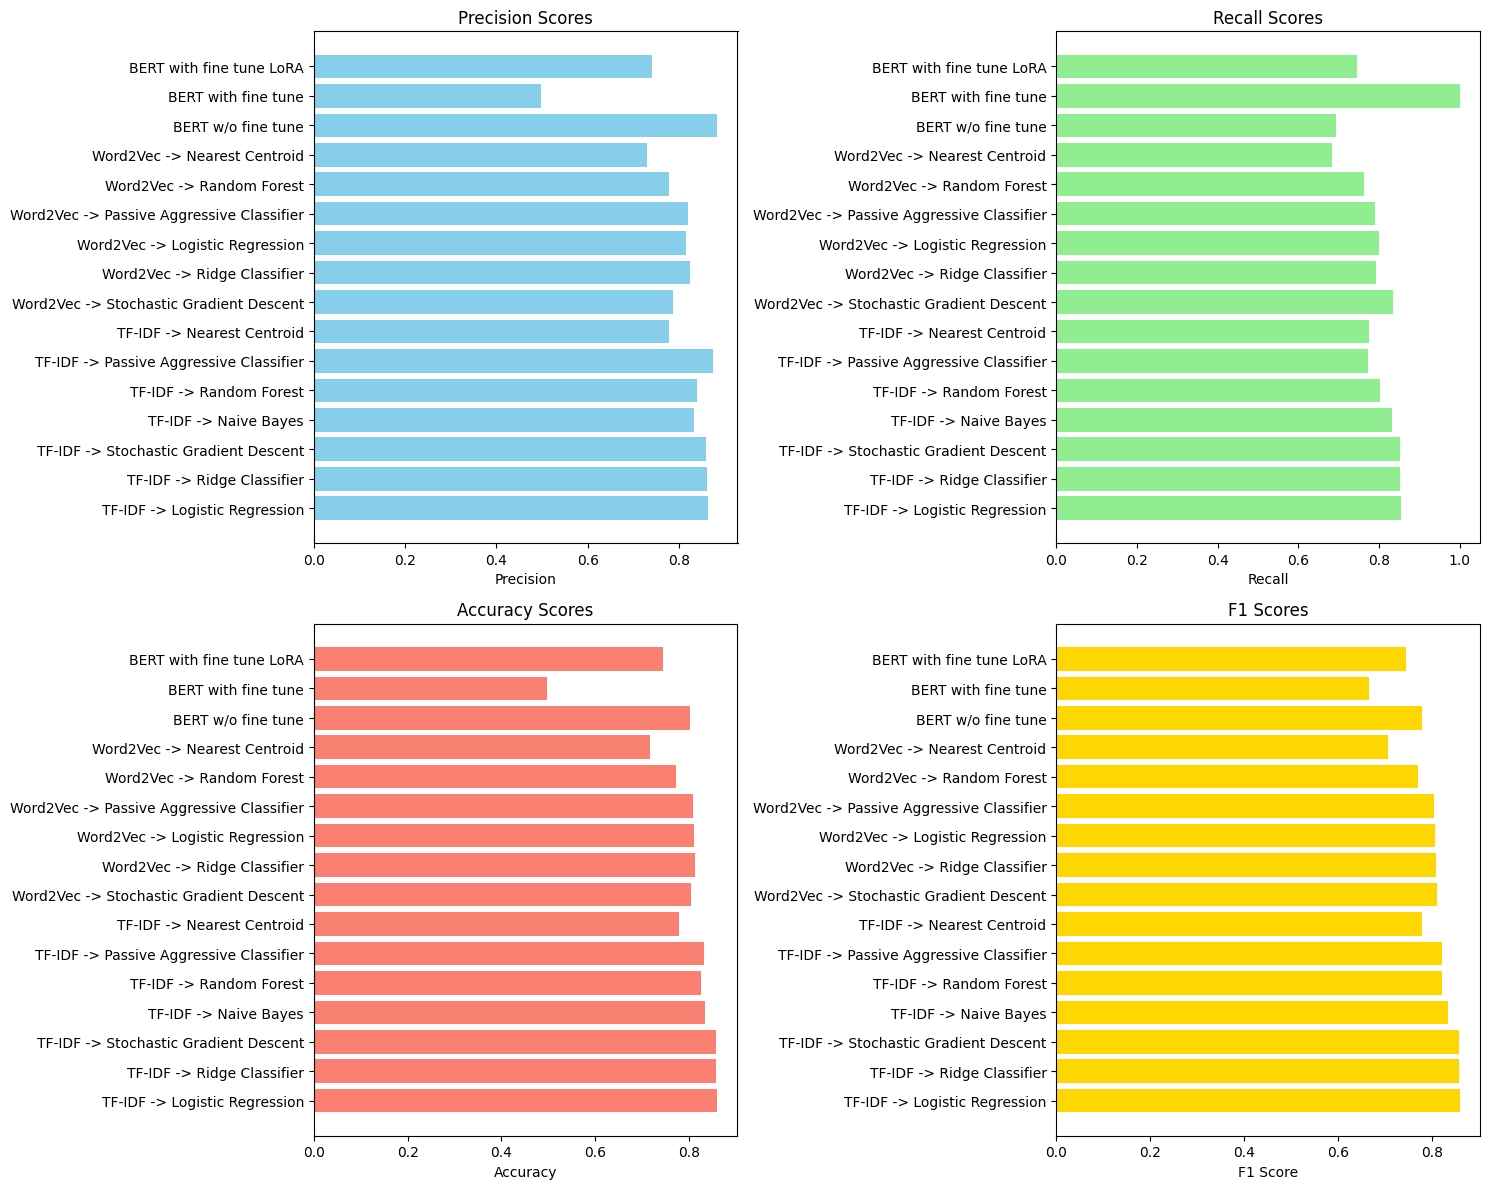

In [ ]:
methods=['TF-IDF -> Logistic Regression',
 'TF-IDF -> Ridge Classifier',
 'TF-IDF -> Stochastic Gradient Descent',
 'TF-IDF -> Naive Bayes',
 'TF-IDF -> Random Forest',
 'TF-IDF -> Passive Aggressive Classifier',
 'TF-IDF -> Nearest Centroid',
 'Word2Vec -> Stochastic Gradient Descent',
 'Word2Vec -> Ridge Classifier',
 'Word2Vec -> Logistic Regression',
 'Word2Vec -> Passive Aggressive Classifier',
 'Word2Vec -> Random Forest',
 'Word2Vec -> Nearest Centroid',
 'BERT w/o fine tune',
 'BERT with fine tune',
 'BERT with fine tune LoRA']

precision=[0.8635,0.8612,0.8602,0.8334,0.8389,0.8745,0.7784,0.7861,0.8242,0.8143,0.8192,0.7773,0.7301,0.8839,0.4972,0.7412]
recall=[0.8533,0.8517,0.8512,0.8321,0.8026,0.7716,0.7756,0.8344,0.7922,0.799,0.7893,0.7617,0.6823,0.6936,1.0,0.7459]
accuracy=[0.86,0.858,0.8573,0.8338,0.8252,0.8313,0.7787,0.8048,0.8127,0.8095,0.8086,0.773,0.7166,0.8023,0.4972,0.7442]
f1_score=[0.8584,0.8564,0.8557,0.8327,0.8204,0.8198,0.777,0.8095,0.8079,0.8066,0.804,0.7694,0.7054,0.7773,0.6642,0.7435]

plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
plt.barh(methods,precision,color='skyblue')
plt.xlabel('Precision')
plt.title('Precision Scores')

plt.subplot(2,2,2)
plt.barh(methods,recall,color='lightgreen')
plt.xlabel('Recall')
plt.title('Recall Scores')

plt.subplot(2,2,3)
plt.barh(methods,accuracy,color='salmon')
plt.xlabel('Accuracy')
plt.title('Accuracy Scores')

plt.subplot(2,2,4)
plt.barh(methods,f1_score,color='gold')
plt.xlabel('F1 Score')
plt.title('F1 Scores')

plt.tight_layout()
plt.show()